Import libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import Data

In [49]:
dataset=pd.read_csv('/kaggle/input/data-preprocessing/Data.csv')
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:, -1].values

In [50]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [51]:
print(Y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


Taking care of missing data

In [52]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:,1:3])
X[:,1:3]=imputer.transform(X[:,1:3])

In [53]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


Encode categorical data

For independent variable

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [55]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


For Dependent variable

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)


In [57]:
print(Y)

[0 1 0 0 1 1 0 1 0 1]


Split data to train and test 

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [59]:
print('X_train')
print(X_train)
print('X_test')
print(X_test)
print('Y_train') 
print(Y_train) 
print('Y_test')
print(Y_test)

X_train
[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]
X_test
[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
Y_train
[0 1 0 0 1 1 0 1]
Y_test
[0 1]


 feature scaling
 Standardization
 Normalisation

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:]=sc.fit_transform(X_train[:,3:])
X_test[:,3:]=sc.transform(X_test[:,3:])

In [62]:
print('X_train')
print(X_train)
print('X_test')
print(X_test)

X_train
[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]
X_test
[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


# Simple linear Regression

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
!pip install scikit-learn

In [14]:
dataset=pd.read_csv('/kaggle/input/salary-data-prediction/Salary_Data.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the model on dataset

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting test set result 

In [18]:
y_pred=regressor.predict(X_test)

visualise training set results 

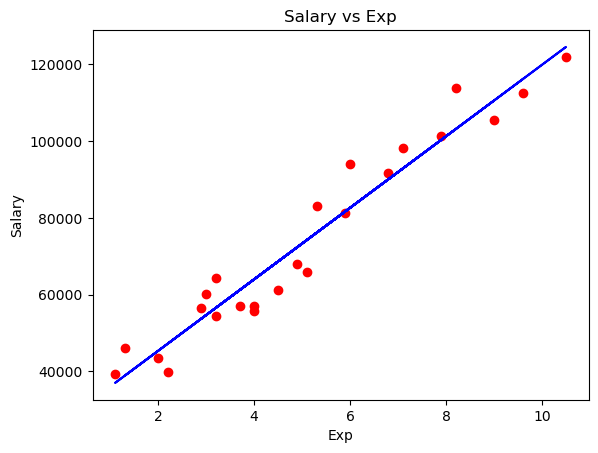

In [20]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Exp')
plt.xlabel('Exp')
plt.ylabel('Salary')
plt.show()

visualise test set results 


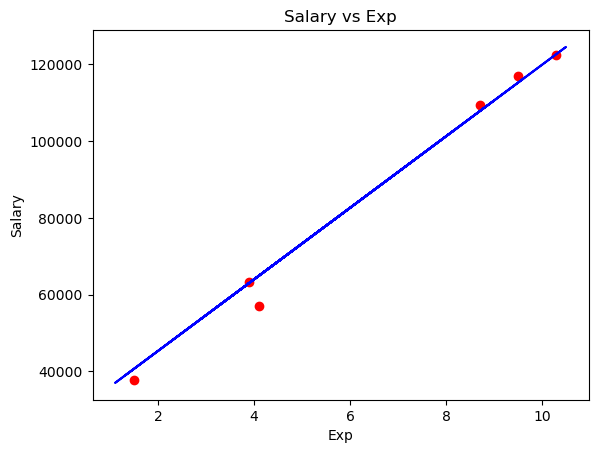

In [21]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Exp')
plt.xlabel('Exp')
plt.ylabel('Salary')
plt.show()

Making a single prediction (for example the salary of an employee with 12 years of experience)

In [22]:
print(regressor.predict([[12]]))

[138531.00067138]


Getting the final linear regression equation with the values of the coefficients

In [24]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.09915062818


Therefore, the equation of our simple linear regression model is:

Salary=9312.57×YearsExperience+26780.09

# Multiple Linear regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('/kaggle/input/50-startups/50_Startups.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:, -1].values

Encoding Categorical data

In [3]:
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[3])], remainder='passthrough' )
X=np.array(ct.fit_transform(X))

split to train and test 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 ,random_state =0 )



Train Multiple linear regression model on traning dataset 

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

Predicting test results

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [7]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


final linear regression equatio

In [8]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


Profit=86.6×Dummy State 1−873×Dummy State 2+786×Dummy State 3+0.773×R&D Spend+0.0329×Administration+0.0366×Marketing Spend+42467.53

# Polynomial linear regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('/kaggle/input/position-salaries/Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:, -1].values

Train Linear regression model on whole data set

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Train Polynomial regression model on whole data set

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =4)
X_Poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_Poly, y)


LinearRegression()

Visualising the linear regression results 

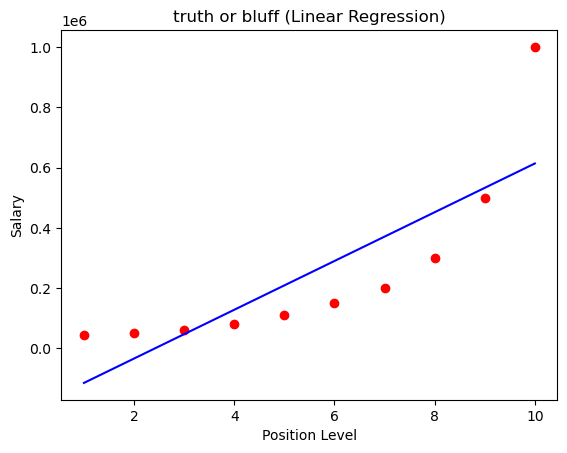

In [5]:
plt.scatter(X,y, color='red')
plt.plot(X,lin_reg.predict(X), color='blue')
plt.title( 'truth or bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


Visualising the Polynomial regression results 

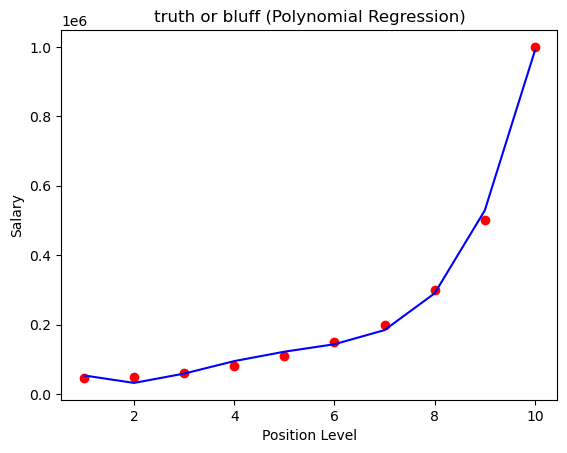

In [10]:
plt.scatter(X,y, color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title( 'truth or bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualising the Polynomial regression results ( for higher resolution and smoother curve)

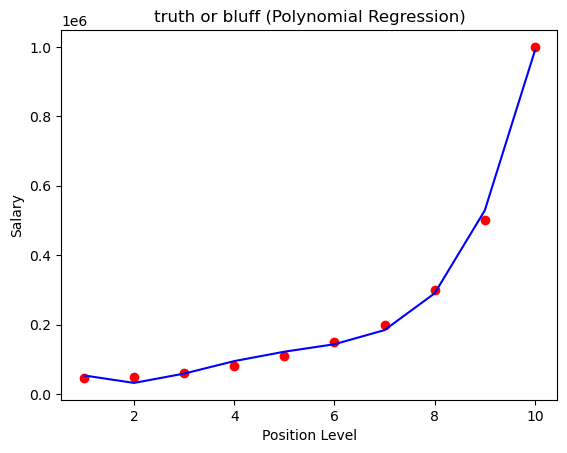

In [12]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y, color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title( 'truth or bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Predict new result with liear regression

In [13]:
lin_reg.predict([[6.5]])

array([330378.78787879])

Predict new result with polynomial regression

In [15]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

# Support Vector Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('/kaggle/input/position-salaries/Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:, -1].values

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 ,random_state =0 )


In [3]:
y = y.reshape(len(y),1)

Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Train the SVR model on whole dataset

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel ='rbf')
regressor.fit(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result 

In [7]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Visualizing the SVR results

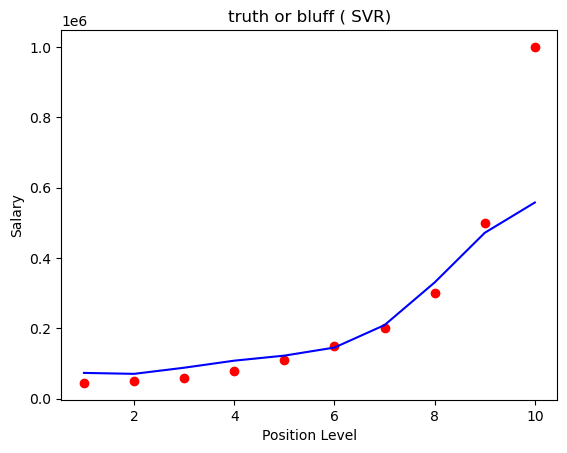

In [8]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title( 'truth or bluff ( SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualizing the SVR results (for resolution and smoothness)

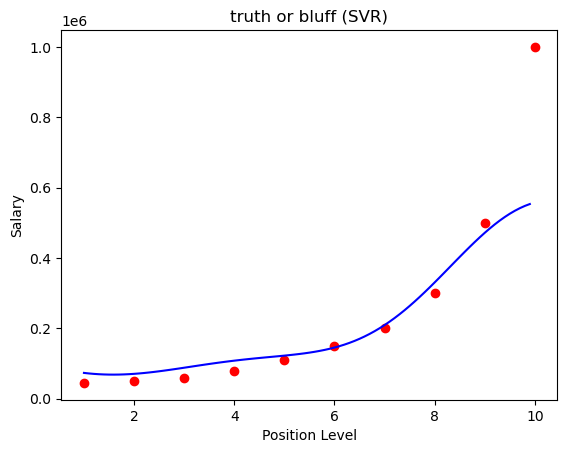

In [11]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='blue')
plt.title( 'truth or bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Decision tree Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('/kaggle/input/position-salaries/Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:, -1].values

Train the Decision Tree model on the whole dataset

In [2]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

Predicting new result

In [3]:
regressor.predict([[6.5]])

array([150000.])

Visualisation

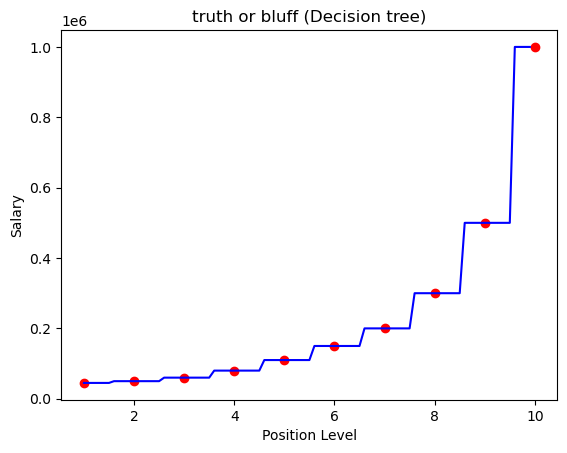

In [4]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title( 'truth or bluff (Decision tree)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Random forest Regression

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('/kaggle/input/position-salaries/Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:, -1].values

Train model

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state =0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

Predict result

In [7]:
regressor.predict([[6.5]])

array([167000.])

Visualisation

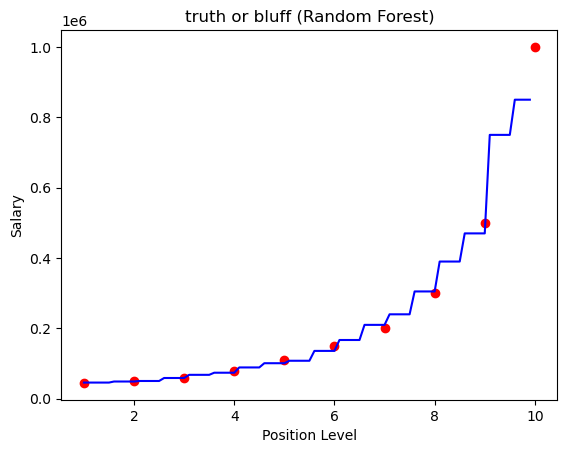

In [8]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title( 'truth or bluff (Random Forest)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Evaluating the model performance 
helps in model selection

In [ ]:
from sklear.metrics import r2_score
r2_score(y_test, y_pred)